# Octave 7.1.0 on CoCalc Ubuntu 20.04



In [2]:
version()

ans = 7.1.0


In [3]:
function sqs = squares(n)
    # Compute the squares of the numbers from 1 to n.

    ### BEGIN SOLUTION
    # Put correct code here. This code is removed for the student version, but is
    # used to confirm that your tests are valid.
    if (n <= 0)
        error("n must be positive")
    endif
    sqs = (1:n).^2;
    ### END SOLUTION
endfunction

In [4]:
# [Modify the tests below for your own problem]
# Check that squares returns the correct output for several inputs:
assert(squares(1), [1])
assert(squares(2), [1 4])

# Check that squares raises an error for invalid input:
number_of_errors = 0;
for n = [0 -1]
    try
        squares(n);
    catch
      number_of_errors++;
    end_try_catch
endfor
assert(number_of_errors, 2)

### BEGIN HIDDEN TESTS
# students will NOT see these extra tests
assert(squares(10), [1 4 9 16 25 36 49 64 81 100])
### END HIDDEN TESTS

In [5]:
function s = foo(a, b)
    # Compute the sum of a and b.

    ### BEGIN SOLUTION
    s = a + b;
    ### END SOLUTION
endfunction

In [6]:
foo(23,23)

ans = 46


In [7]:
[2 3 4]' * [4 3 -1]

ans =

    8    6   -2
   12    9   -3
   16   12   -4



In [8]:
x = rand(3,3)^3

x =

   1.0179   0.7467   0.6404
   0.6341   0.4800   0.4915
   0.8930   0.6696   0.6459



In [9]:
save r-octave.mat x -7

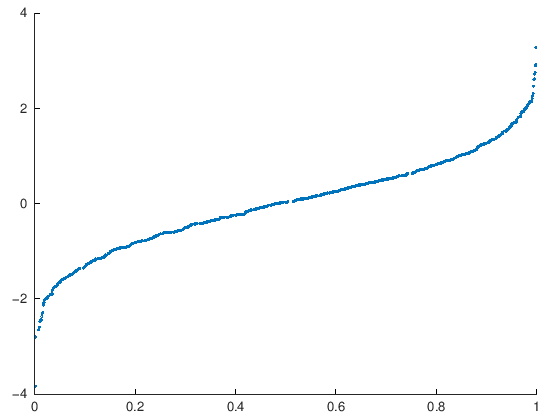

In [10]:
scatter(sort(rand(1000, 1)), sort(randn(1000, 1)))

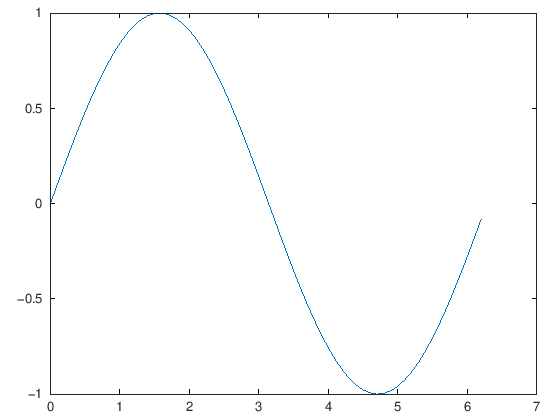

In [11]:
i = 0:.1:2*pi;
plot(i, sin(i))

In [12]:
pkg load symbolic;
syms x;
f = sin(x);
diff(f,x)

Symbolic pkg v2.9.0: /usr/local/lib/python3.8/dist-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 


importing sympy.core.compatibility with 'from sympy import *' has been


deprecated since SymPy 1.6. Use import sympy.core.compatibility


instead. See https://github.com/sympy/sympy/issues/18245 for more


info.


  self.Warn(


Traceback (most recent call last):


  File "<stdin>", line 1, in <module>


  File "<stdin>", line 12, in octoutput_drv


  File "<stdin>", line 54, in octoutput


  File "<stdin>", line 55, in octoutput


  File "/usr/local/lib/python3.8/dist-packages/sympy/__init__.py", line 677, in __getattr__


    return getattr(self.mod, name)


AttributeError: module 'sympy.core.compatibility' has no attribute 'integer_types'

In [0]:
pkg load symbolic; syms x
f = 2 * (cos(x) + sin(x)^2)
f1 = diff(f, x)

In [0]:
xx = -10:0.1:10;
plot(xx, f(xx))

In [0]:
pkg load image

In [0]:
a = ones(100, 100);
b = ones(100, 100);
b(3, 1) = .5;
psnr(a, b)

This plot shows the famous 3D sombrero.

A quadratic meshgrid of $x$ and $y$ coordinates is evaluated via $\sqrt{x^2 + y^2} + \epsilon$ and the value $r$ is then the value plotted along the third dimension.

Reference: [3d plots](https://octave.org/doc/v4.2.2/Three_002dDimensional-Plots.html#Three_002dDimensional-Plots)

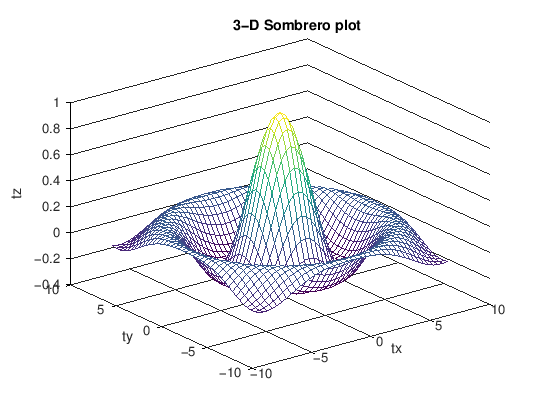

In [14]:
tx = ty = linspace (-8, 8, 41)';
[xx, yy] = meshgrid (tx, ty);
r = sqrt (xx .^ 2 + yy .^ 2) + eps;
tz = sin (r) ./ r;
mesh (tx, ty, tz);
xlabel ("tx");
ylabel ("ty");
zlabel ("tz");
title ("3-D Sombrero plot");

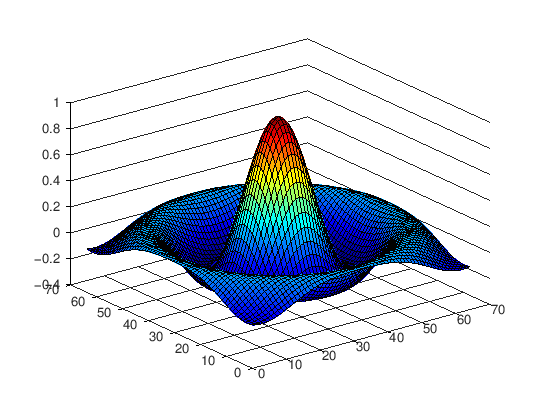

In [15]:
[x,y] = meshgrid(-16:0.5:16);
r = hypot(x,y)/2 + eps;
figure;
surf(sin(r)./r);
colormap(jet);

This draws the set of points, where the given equation is satisfied.
Here, it shows a tilted ellipse.

$$x^2 + 3 (y-1)^2 + \frac{x y}{2} = 6$$

Reference: [ezplot](https://octave.org/doc/v4.2.2/Two_002ddimensional-Function-Plotting.html#Two_002ddimensional-Function-Plotting)

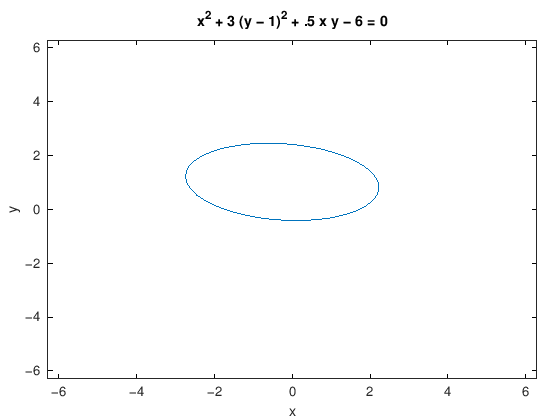

In [16]:
ezplot (@(x, y) x.^2 + 3 * (y - 1).^2 + .5 * x .* y - 6)

Imagine you want to evaluate a binary function $f(x,\,y) := x + 2 y$.

For evaluating it in vectorized notation, you need a grid for the cartesian product of all $x$ and $y$.

In [13]:
x = 0:3;
y = 0:4;
[xx, yy] = meshgrid(x, y);
xx + 2*yy

ans =

    0    1    2    3
    2    3    4    5
    4    5    6    7
    6    7    8    9
    8    9   10   11



## Octave's ODE PKG in Action

In [0]:
pkg load odepkg;

In [0]:
dxdt = @(t, x) - 0.24 * x.^2 + t;
tsteps = [0:0.1:5];
[t, x] = ode45(dxdt, tsteps, [-1:0.5:3]);
plot(t, x)

You can run numerical optimizations via the [optim](https://octave.sourceforge.io/optim/package_doc/index.html) package.

In this example we minimize the classical Rosenbrock function in 20 dimensions using BFGS.

In [0]:
pkg load optim;

function [obj_value, gradient] = objective(theta, location)
  x = theta - location + ones(rows(theta),1); # move minimizer to "location"
  [obj_value, gradient] = rosenbrock(x);
endfunction

dim = 20;                 # dimension of Rosenbrock function
theta0 = zeros(dim+1,1);  # starting values
location = (0:dim)/dim;   # true values
location = location';
control = {Inf,1};        # maxiters, verbosity

bfgsmin("objective", {theta0, location}, control);

## testing java support

In [0]:
__have_feature__ JAVA

In [0]:
javaclasspath

In [0]:
a = 1.001;
b = javaObject ("java.math.BigDecimal", a);

In [0]:
isjava (b)
b.toString()

In [0]:
b.add(b).toString()

In [0]:
[3 4 5]

In [0]:
randn(5)

In [0]:
javaObject('java.math.BigInteger','0')

In [0]:
randn(6,6) \ randn(6,1)

In [0]:
randn(6,6)

In [0]:
41 \ 4